In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
df = pd.read_csv("train.csv")

In [32]:
df.head(10)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df = df.values

In [35]:
df.shape

(42000, 785)

In [36]:
28*28

784

In [42]:
df[:4 , 0]

array([1, 0, 1, 4])

In [27]:
X = df[:,1:]
Y = df[:,0]

In [28]:
X , Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 0, 1, ..., 7, 6, 9]))

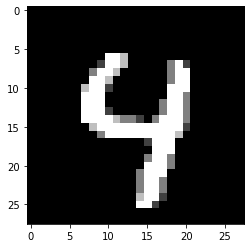

4


In [53]:
def draw(sample):
    img = sample.reshape([28,28])
    plt.imshow(img ,  cmap = "gray")
    plt.show()

    
draw(X[78])
print(Y[78])

#dataset  ---> train, validation
#train , validation , test  
#train.x --> model train(m , c) ---> train.y
#valdiation. x--> model --->predicted .y
#valiudatoion.y , predicted .y = accuracy


##test.x -->model --> precdict.y

In [61]:
split = int(X.shape[0]*0.9)

X_train = X[:split , :]
Y_train = Y[:split ]

X_test = X[split: , :]
Y_test = Y[split:]

In [62]:
split

37800

In [63]:
print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(37800, 784) (37800,)
(4200, 784) (4200,)



# Algorithm

In [64]:
#KNN

In [65]:
X_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 130, 191,
       234, 255, 255, 148,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 104, 225,
       253, 253, 253, 253, 253, 153,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [66]:
def distance(x1 , x2):
    return np.sqrt(sum((x1-x2)**2))

In [70]:
def knn(X , Y , query ,  k = 5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        dist = distance(X[i] , query)
        vals.append([dist , Y[i]])

    vals = sorted(vals)

    vals = vals[:k]
    vals = np.array(vals)

    #print(vals[:,1])
    new_val = np.unique(vals [:,1] , return_counts = True)

    #print(new_val)

    index = new_val[1].argmax()

    #print(index)

    ans = new_val[0][index]

    #print(new_val[0][index])
    
    return ans

In [78]:
pred = knn(X_train , Y_train ,X_test[10] , k=20)
print(pred , Y_test[10])

1.0 1


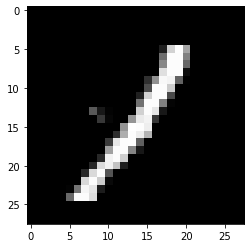

In [79]:
draw(X_test[10])

In [85]:
m= 10#Y_test.shape[0]
count = 0
for i in range(m):
    if knn(X_train,Y_train , X_test[i] , k = 7 )==Y_test[i]:
        count+=1
        
print(count/m)

1.0


In [86]:
count

10